# Medical Image Segmentation: Basics

Basic image segmentation methods applied on lung computed tomography image. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse.csgraph import connected_components
from skimage.measure import label, regionprops
from scipy import ndimage

folder = '../H2_segmentation/Data_lecture_Segmentation_Basics/' 
imageArray = np.load(folder + 'lungCTSlice.npy')
maskArray = np.load(folder + 'lungMask.npy')

## Thresholding

In [14]:
# function for thresholding 2D arrays
def thresholding(img, t):
    seg_img = np.empty(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] <= t:
                seg_img[i,j] = 1
    return seg_img
        
# function for visualization of thresholding results
def plot_threshold(orig_img ,imgs,thresholds):
    fig, ax = plt.subplots(1, 4, figsize=(15,5))
    ax[0].set_title('Lung CT image')
    ax[0].imshow(orig_img)
    ax[0].axis("off")
    
    i = 0
    for img in imgs:
        ax[i+1].set_title(f'Threshold level: {thresholds[i]}')
        ax[i+1].imshow(img)
        ax[i+1].axis("off")
        i += 1

Implementing and visualizing thresholding on the original lung CT image for different threshold values: -500, -300, and -150 threshold levels.

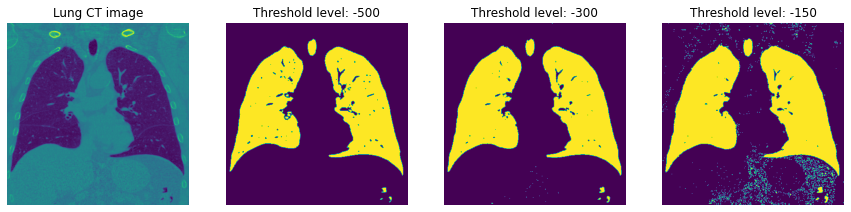

In [15]:
seg_1 = thresholding(imageArray, -500)
seg_2= thresholding(imageArray, -300)
seg_3 = thresholding(imageArray, -150)

plot = plot_threshold(imageArray, [seg_1,seg_2,seg_3], [-500,-300,-150])

# Dice coefficient

Dice coefficient is useful to evaluate the results of image segmentation. The Dice coefficient counts pixels that are classified as the object in both manual and automated segmentation (true positives TP), as background in manual segmentation and as the object in automated segmentation (false positive FP), as the object in manual segmentation and as background in automated segmentation (false negative FN) and as background in both manual and automated segmentation (true negative TN)

The Dice coefficient is computed as:
$$DSC = \frac{2*TP}{2*TP + FP + FN} $$

In [20]:
# implementation of the Dice coefficient calculation
def dice_coef(img_true, y_pred):
    intersection = np.sum(img_true * y_pred)
    if (np.sum(img_true)==0) and (np.sum(y_pred)==0):
        return 1
    return (2*intersection) / (np.sum(img_true) + np.sum(y_pred))

In [21]:
# finding the most optimal threshold value for lung CT image based on dice coefficient calculation 

def optimal_dice_coefficient(start_i, end_i):
    best_i = 0
    best_coef = 0

    for i in range(start_i, end_i):
        t_img = thresholding(imageArray,i)
        dice = dice_coef(maskArray,t_img)
        if best_coef < dice: 
            best_coef = dice
            best_i = i        
    return best_i, best_coef

In [19]:
optimal_dice_coefficient(-1000,0)

(-476, 0.9778319162323938)

# Connected Component Decomposition

In [22]:
# function for connected component decomposition on 2D arrays

def connected_components(img):
    labeled_comp = label(img)
    regions = regionprops(labeled_comp)
    plt.imshow(labeled_comp)
    print(f'Number of found regions: {len(regions)}')
    
    return labeled_comp

Number of found regions: 2


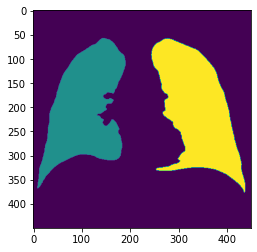

In [23]:
labels = connected_components(maskArray)

In [24]:
# extracting the largest connected component

def largest_component(labeled_img, original_img):
    max = labeled_img == np.argmax(np.bincount(labeled_img.flat, weights=original_img.flat))
    plt.imshow(max)
    plt.title('Largest connected component')

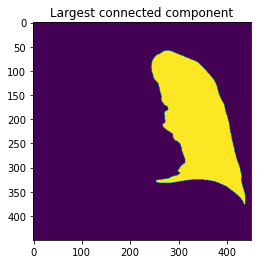

In [25]:
largest_component(labels, maskArray)

# Morthological operation

Simple morthological operations (erosion and dilation) applied on segmented and thresholded lung images. 

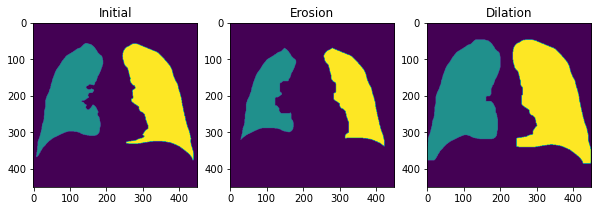

In [26]:
segm_e = ndimage.grey_erosion(labels, size=(20,20))
segm_d = ndimage.grey_dilation(labels, size=(20,20))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 5))
ax1.set_title('Initial')
ax1.imshow(labels)

ax2.set_title('Erosion')
ax2.imshow(segm_e)

ax3.set_title('Dilation')
ax3.imshow(segm_d)

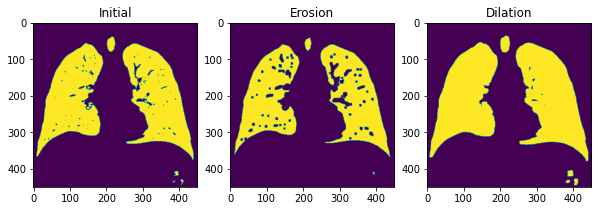

In [27]:
thres_e = ndimage.grey_erosion(seg_1, size=(5,5))
thres_d = ndimage.grey_dilation(seg_1, size=(5,5))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10, 5))
ax1.set_title('Initial')
ax1.imshow(seg_1)

ax2.set_title('Erosion')
ax2.imshow(thres_e)

ax3.set_title('Dilation')
ax3.imshow(thres_d)